## Î™©Ï†Å
- ÎßàÏºÄÌåÖ Ï†ÑÎûµ ÏàòÎ¶ΩÏùÑ ÏúÑÌïú Í≥†Í∞ù Íµ∞ÏßëÌôî
- Íµ∞ÏßëÎ≥Ñ Í≥†Í∞ùÏùò ÌäπÏÑ± ÌååÏïÖ

In [1]:
# Í∏∞Î≥∏ Ìå®ÌÇ§ÏßÄ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

## Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
- Ï∂úÏ≤ò
    - https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
    - ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ïª¨ÎüºÎ™ÖÏùÑ ÌïúÍ∏ÄÌôî ÌïòÏòÄÏùå
- Îã®ÏúÑ
    - Ïó∞Í∞ÑÏÜåÎìù : Ï≤úÎã¨Îü¨
    - ÏÜåÎπÑÏ†êÏàò : 1~100Ï†ê

In [2]:
df = pd.read_csv("C:/Users/EL087/Desktop/MS_MachineLearning/data/ÏáºÌïëÎ™∞Í≥†Í∞ùÍµ∞ÏßëÌôî.csv")
df.head()

Í≥†Í∞ùID      ÏÑ±Î≥Ñ  ÎÇòÏù¥  Ïó∞Í∞ÑÏÜåÎìù  ÏÜåÎπÑÏ†êÏàò
0     1    Male  19    15    39
1     2    Male  21    15    81
2     3  Female  20    16     6
3     4  Female  23    16    77
4     5  Female  31    17    40

## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

#### ÏÇ¨Ïö©Ìï† Ïª¨Îüº ÏÑ†ÌÉù

In [3]:
X = df.drop(['Í≥†Í∞ùID'], axis=1) # Í≥†Í∞ù Ïó¥ Ï†úÍ±∞
X.head()

ÏÑ±Î≥Ñ  ÎÇòÏù¥  Ïó∞Í∞ÑÏÜåÎìù  ÏÜåÎπÑÏ†êÏàò
0    Male  19    15    39
1    Male  21    15    81
2  Female  20    16     6
3  Female  23    16    77
4  Female  31    17    40

In [4]:
# ---------------------------------
# Îç∞Ïù¥ÌÑ∞ Ïú†Ìòï Íµ¨Î∂Ñ - Î≤îÏ£ºÌòï/ÏàòÏπòÌòï
# ---------------------------------
cat_cols = X.select_dtypes(include='object').columns # Î≤îÏ£ºÌòï Ïª¨Îüº
num_cols = X.select_dtypes(include='number').columns # ÏàòÏπòÌòï Ïª¨Îüº

#### Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî©

- `drop='first'`
    - Î≤îÏ£ºÌòïÏùò Í≥†Ïú≥Í∞íÏù¥ 2Í∞úÏù∏ Í≤ΩÏö∞ ÌïòÎÇòÏùò Ïª¨ÎüºÎßå ÏÇ¨Ïö©

In [5]:
# -----------------
# Ïù∏ÏΩîÎçî ÏÉùÏÑ±
# -----------------
from sklearn.preprocessing import OneHotEncoder     # Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏπòÌòï Î≤°ÌÑ∞Ïù∏ 0, 1Î°ú Î≥ÄÌôò
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

# -----------------
# Ïù∏ÏΩîÎî©
# -----------------
X_encoded = encoder.fit_transform(X[cat_cols])

# -----------------
# Ïù∏ÏΩîÎî© Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌòïÌÉúÎ°ú ÎßåÎì§Í∏∞
# -----------------
X_encoded = pd.DataFrame(X_encoded, columns=['ÏÑ±Î≥Ñ'])
X_encoded.head()

ÏÑ±Î≥Ñ
0  1.0
1  1.0
2  0.0
3  0.0
4  0.0

Ïù∏ÏΩîÎçî ÏÉùÏÑ±
- OneHotEncoder: Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏπòÌòï Î≤°ÌÑ∞Ïù∏ 0, 1Î°ú Î≥ÄÌôò
- sparse_output=False: Ïù∏ÏΩîÎî© Í≤∞Í≥ºÎ•º Ïö∞Î¶¨Í∞Ä Î≥¥Í∏∞ Ïâ¨Ïö¥ ÏùºÎ∞ò Î∞∞Ïó¥(dense array) ÌòïÌÉúÎ°ú Ï∂úÎ†•ÌïòÎèÑÎ°ù ÏÑ§Ï†ï
- handle_unknown='ignore': ÌïôÏäµ(fit) Í≥ºÏ†ïÏóêÏÑú Î≥¥ÏßÄ Î™ªÌñàÎçò **ÏÉàÎ°úÏö¥ Î≤îÏ£ºÍ∞í**Ïù¥ Ïù∏ÏΩîÎî© Îã®Í≥ÑÏóêÏÑú ÎÇòÌÉÄÎÇòÎèÑ  
 ÏóêÎü¨Î•º Î∞úÏÉùÏãúÌÇ§ÏßÄ ÏïäÍ≥† Î¨¥Ïãú (Î™®Îëê 0ÏúºÎ°ú Ï≤òÎ¶¨)ÌïòÎèÑÎ°ù ÏÑ§Ï†ï
- drop='first': Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†úÎ•º Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ Í∞Å Î≤îÏ£ºÌòï Ïª¨ÎüºÏóêÏÑú Ï≤´ Î≤àÏß∏ Î≤îÏ£ºÏóê Ìï¥ÎãπÌïòÎäî ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏùÑ Ï†úÍ±∞ÌïòÎèÑÎ°ù ÏÑ§Ï†ï

Ïù∏ÏΩîÎî©
- fit Îã®Í≥Ñ: Ïù∏ÏΩîÎçîÍ∞Ä ÏÑ†ÌÉùÎêú Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞('ÏÑ±Î≥Ñ' Ïª¨ÎüºÏùò 'Male', 'Female' Îì±)Î•º Î∂ÑÏÑùÌïòÏó¨ Ïñ¥Îñ§ Î≤îÏ£ºÎì§Ïù¥ ÏûàÎäîÏßÄ ÌååÏïÖ(ÌïôÏäµ)
- transform Îã®Í≥Ñ: ÌååÏïÖÎêú Î≤îÏ£ºÎì§ÏùÑ ÏÑ§Ï†ï(drop='first')Ïóê ÎßûÏ∂îÏñ¥ Ïõê-Ìï´ Ïù∏ÏΩîÎî©ÏùÑ ÏàòÌñâÌïòÏó¨ ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ Î∞∞Ïó¥Î°ú Î≥ÄÌôò

In [6]:
# Ï†ÑÏ≤òÎ¶¨Í∞Ä Ïûò ÎêòÏóàÎäîÏßÄ ÌôïÏù∏ (ÏÑ±Î≥ÑÏù¥ Î™®Îëê 0, 1)

# 1. Ïù∏ÏΩîÎî©Îêú Îã®Ïùº Ïª¨ÎüºÏùÑ ÏÑ†ÌÉù
encoded_column = X_encoded.iloc[:, 0] # Ï≤´ Î≤àÏß∏ (Ïù¥Ïûê Ïú†ÏùºÌïú) Ïª¨Îüº ÏÑ†ÌÉù

# 2. value_counts()Î•º ÏÇ¨Ïö©ÌïòÏó¨ 0Í≥º 1Ïùò Í∞úÏàò ÌôïÏù∏
counts = encoded_column.value_counts()

# 3. Í≤∞Í≥º Ï∂úÎ†•
print("0Í≥º 1Ïùò Í∞úÏàò:")
print(counts)

0Í≥º 1Ïùò Í∞úÏàò:
ÏÑ±Î≥Ñ
0.0    112
1.0     88
Name: count, dtype: int64


#### ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ

In [7]:
# -----------------
# Ïä§ÏºÄÏùºÎü¨ ÏÉùÏÑ±
# -----------------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# -----------------
# Ïä§ÏºÄÏùºÎßÅ
# -----------------
X_scaled = scaler.fit_transform(X[num_cols])

# -----------------
# Ïä§ÏºÄÏùº Îêú Îç∞Ïù¥ÌÑ∞Î•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌòïÌÉúÎ°ú ÎßåÎì§Í∏∞
# -----------------
X_scaled = pd.DataFrame(X_scaled, columns=num_cols)
X_scaled.head()

ÎÇòÏù¥      Ïó∞Í∞ÑÏÜåÎìù      ÏÜåÎπÑÏ†êÏàò
0 -1.424569 -1.738999 -0.434801
1 -1.281035 -1.738999  1.195704
2 -1.352802 -1.700830 -1.715913
3 -1.137502 -1.700830  1.040418
4 -0.563369 -1.662660 -0.395980

In [8]:
# Ï†ÑÏ≤òÎ¶¨Í∞Ä Ïûò ÎêòÏóàÎäîÏßÄ ÌôïÏù∏ (ÌèâÍ∑†: 0, ÌëúÏ§ÄÌé∏Ï∞®: 1)
pd.set_option('display.float_format', '{:.4f}'.format)      # Ï†ïÏàòÌòïÏãùÏúºÎ°ú Ï∂úÎ†•

# 1. Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ X_scaledÏùò ÌèâÍ∑† ÌôïÏù∏
print("--- ÌèâÍ∑† (Mean) ---")
print(X_scaled.mean())

# 2. Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ X_scaledÏùò ÌëúÏ§ÄÌé∏Ï∞® ÌôïÏù∏
print("\n--- ÌëúÏ§ÄÌé∏Ï∞® (Standard Deviation) ---")
print(X_scaled.std())

# 3. Îç∞Ïù¥ÌÑ∞Ïùò Í∞ÑÎã®Ìïú ÌÜµÍ≥Ñ ÏöîÏïΩ ÌôïÏù∏
print("\n--- ÌÜµÍ≥Ñ ÏöîÏïΩ (Describe) ---")
print(X_scaled.describe())

--- ÌèâÍ∑† (Mean) ---
ÎÇòÏù¥     -0.0000
Ïó∞Í∞ÑÏÜåÎìù   -0.0000
ÏÜåÎπÑÏ†êÏàò   -0.0000
dtype: float64

--- ÌëúÏ§ÄÌé∏Ï∞® (Standard Deviation) ---
ÎÇòÏù¥     1.0025
Ïó∞Í∞ÑÏÜåÎìù   1.0025
ÏÜåÎπÑÏ†êÏàò   1.0025
dtype: float64

--- ÌÜµÍ≥Ñ ÏöîÏïΩ (Describe) ---
            ÎÇòÏù¥     Ïó∞Í∞ÑÏÜåÎìù     ÏÜåÎπÑÏ†êÏàò
count 200.0000 200.0000 200.0000
mean   -0.0000  -0.0000  -0.0000
std     1.0025   1.0025   1.0025
min    -1.4963  -1.7390  -1.9100
25%    -0.7248  -0.7275  -0.5998
50%    -0.2045   0.0359  -0.0078
75%     0.7284   0.6657   0.8851
max     2.2355   2.9177   1.8945


#### Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£åÎêú ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞

In [9]:
# Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£åÎêú ÏàòÏπòÌòï, Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Í≤∞Ìï©
X_preporcessed = pd.concat([X_encoded, X_scaled], axis=1)
X_preporcessed.head()

ÏÑ±Î≥Ñ      ÎÇòÏù¥    Ïó∞Í∞ÑÏÜåÎìù    ÏÜåÎπÑÏ†êÏàò
0 1.0000 -1.4246 -1.7390 -0.4348
1 1.0000 -1.2810 -1.7390  1.1957
2 0.0000 -1.3528 -1.7008 -1.7159
3 0.0000 -1.1375 -1.7008  1.0404
4 0.0000 -0.5634 -1.6627 -0.3960

### Íµ∞ÏßëÌôî

#### ÏóòÎ≥¥Ïö∞ Í∏∞Î≤ïÏúºÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Í∞ØÏàò Ï†ïÌïòÍ∏∞

In [10]:
# -----------------
# Ïù¥ÎÑàÏÖî Íµ¨ÌïòÍ∏∞
# -----------------
min_cluster = 2
max_cluster = 10
random_state = 42

from sklearn.cluster import KMeans
inertia = []
for n in range(min_cluster,max_cluster):
    km = KMeans(n_clusters=n, random_state=random_state)
    km.fit(X_preporcessed)
    print(km.inertia_)
    inertia.append(km.inertia_)

438.5224115567775
345.2050346991059
254.36171423484498
216.7849015165104
181.9514362434146
171.3726604894381
153.29724063982397
142.71846488584748


- ÏóòÎ≥¥Ïö∞ Í∏∞Î≤ïÏùÄ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò($K$)Î•º ÎäòÎ†§Í∞à Îïå $\text{Inertia}$ Í∞íÏùò Í∞êÏÜå Ìè≠Ïù¥ Í∏âÍ≤©ÌïòÍ≤å ÎëîÌôîÎêòÍ∏∞ ÏãúÏûëÌïòÎäî ÏßÄÏ†ê,  
    Ï¶â Í∑∏ÎûòÌîÑÏóêÏÑú 'ÌåîÍøàÏπò'Ï≤òÎüº Í∫æÏù¥Îäî ÏßÄÏ†êÏùÑ ÏµúÏ†ÅÏùò $K$Î°ú ÏÑ†ÌÉù

    - $K=4$ÏóêÏÑú $K=5$Î°ú ÎÑòÏñ¥Í∞à Îïå Í∞êÏÜåÌè≠Ïù¥ **$37.58$**Î°ú Ï§ÑÏñ¥Îì§Î©∞, Ïù¥Ï†Ñ Íµ¨Í∞Ñ ÎåÄÎπÑ Í∏âÍ≤©Ìûà ÎëîÌôî
    - Îî∞ÎùºÏÑú $\text{Inertia}$Ïùò Í∞êÏÜåÏú®Ïù¥ Í∞ÄÏû• ÌÅ¨Í≤å Í∫æÏù¥Îäî ÏßÄÏ†êÏùÄ **$K=5$**ÎùºÍ≥† ÌåêÎã®ÌïòÎäî Í≤ÉÏù¥ Í∞ÄÏû• Ìï©Î¶¨Ï†Å

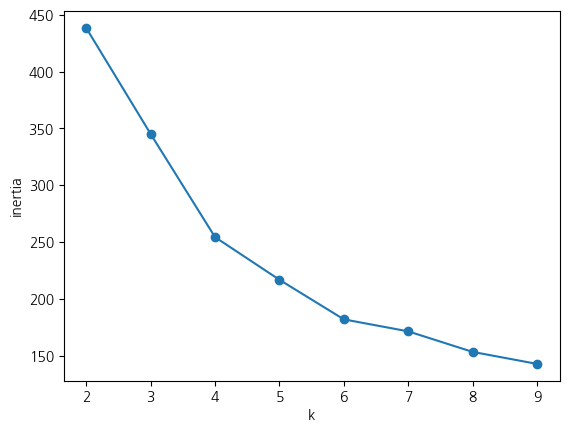

In [11]:
# -----------------
# Ïù¥ÎÑàÏÖî ÏãúÍ∞ÅÌôî
# -----------------
plt.plot(range(min_cluster,max_cluster), inertia, marker='o')
plt.xticks(range(min_cluster,max_cluster))
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

#### Ïã§Î£®Ïó£ Ï†êÏàòÎ°ú ÏµúÏ†ÅÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞ØÏàò Ï∞æÍ∏∞
- Ïã§Î£®Ïó£ Ï†êÏàòÎûÄ?
    - Ìïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûêÏã†Ïùò ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏïàÏóêÏÑúÎäî ÏñºÎßàÎÇò Í∞ÄÍπùÍ≥† Îã§Î•∏ ÌÅ¥Îü¨Ïä§ÌÑ∞ÏôÄÎäî ÏñºÎßàÎÇò Îñ®Ïñ¥Ï†∏ÏûàÎäîÍ∞ÄÎ•º Ï∏°Ï†ïÌïú Í∞í
    - 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Ïûò Î∂ÑÎ¶¨Îêú ÌÅ¥Îü¨Ïä§ÌÑ∞
    - 0Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ñ Í≤ΩÍ≥ÑÍ∞Ä Ïï†Îß§Ìï®
    - ÏùåÏàò -> ÏûòÎ™ªÎêú Íµ∞Ïßë Î∞∞Ï†ï Í∞ÄÎä•ÏÑ±

In [12]:
# -----------------
# Íµ∞Ïßë Í∞ØÏàòÏóê Îî∞Î•∏ Ïã§Î£®Ïó£ Ï†êÏàò
# -----------------
from sklearn.metrics import silhouette_score
for k in range(min_cluster, max_cluster):
    model = KMeans(n_clusters=k, random_state=random_state)
    labels = model.fit_predict(X_preporcessed)
    score = silhouette_score(X_preporcessed, labels)
    print(f"k = {k}, Ïã§Î£®Ïó£ Ï†êÏàò = {score:.3f}")

k = 2, Ïã§Î£®Ïó£ Ï†êÏàò = 0.303
k = 3, Ïã§Î£®Ïó£ Ï†êÏàò = 0.312
k = 4, Ïã§Î£®Ïó£ Ï†êÏàò = 0.350
k = 5, Ïã§Î£®Ïó£ Ï†êÏàò = 0.350
k = 6, Ïã§Î£®Ïó£ Ï†êÏàò = 0.356
k = 7, Ïã§Î£®Ïó£ Ï†êÏàò = 0.332
k = 8, Ïã§Î£®Ïó£ Ï†êÏàò = 0.336
k = 9, Ïã§Î£®Ïó£ Ï†êÏàò = 0.312


- Ïã§Î£®Ïó£ Ï†êÏàòÎßå ÎÜìÍ≥† Î≥¥Î©¥ Í∞ÄÏû• ÎÜíÏùÄ Ï†êÏàòÎ•º ÏñªÏùÄ $K$Î•º ÏµúÏ†Å Í∞íÏúºÎ°ú ÏÑ†ÌÉù
- Í∞ÄÏû• ÎÜíÏùÄ Ïã§Î£®Ïó£ Ï†êÏàòÎäî 0.356Ïù¥Î©∞, Ïù¥ÎïåÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàòÎäî *$K=6$*

**ÏóòÎ≥¥Ïö∞ Í∏∞Î≤ïÍ≥ºÏùò ÌÜµÌï© ÌåêÎã®**

Îëê ÏßÄÌëúÎ•º Ï¢ÖÌï©Ï†ÅÏúºÎ°ú Í≥†Î†§Ìï† Îïå, Îã§Ïùå Îëê Í∞ÄÏßÄ Ï§ë ÌïòÎÇòÎ•º ÏÑ†ÌÉùÌï† Ïàò ÏûàÏùå
1. $K=6$ ÏÑ†ÌÉù (Ïã§Î£®Ïó£ Ï†êÏàò Ïö∞ÏÑ†): Ïã§Î£®Ïó£ Ï†êÏàòÍ∞Ä Í∞ÄÏû• ÎÜíÏïÑ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùò ÌíàÏßàÏù¥ Í∞ÄÏû• Ï¢ãÎã§Í≥† ÌèâÍ∞ÄÎêòÎäî ÏßÄÏ†ê (0.350 $\rightarrow$ 0.356ÏúºÎ°ú ÎØ∏ÏÑ∏ÌïòÍ≤å Ï¶ùÍ∞Ä)
2. $K=5$ ÏÑ†ÌÉù (ÏóòÎ≥¥Ïö∞ Î∞è Í∞ÑÍ≤∞ÏÑ± Ïö∞ÏÑ†): $K=5$Ïùò Ïã§Î£®Ïó£ Ï†êÏàò(0.350)Îäî $K=6$Ïùò Ï†êÏàò(0.356)ÏôÄ Í±∞Ïùò Ï∞®Ïù¥Í∞Ä ÏóÜÏúºÎ©∞ (Ï∞®Ïù¥ $0.006$),  
ÏóòÎ≥¥Ïö∞ Í∏∞Î≤ïÏù¥ ÏßÄÏ†ÅÌïú ÎπÑÏö© Ìö®Ïú®Ï†ÅÏù∏ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùò ÏãúÏûëÏ†ê

- ÏùºÎ∞òÏ†ÅÏúºÎ°ú Îëê Ï†êÏàòÍ∞Ä ÎπÑÏä∑Ìï† Í≤ΩÏö∞ Îçî Ï†ÅÏùÄ ÏàòÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞Î•º ÏÑ†ÌÉùÌïòÏó¨ Î™®Îç∏Ïùò Ìï¥ÏÑù Ïö©Ïù¥ÏÑ±(Í∞ÑÍ≤∞ÏÑ±)ÏùÑ ÎÜíÏù¥Îäî Í≤ΩÌñ•Ïù¥ ÏûàÏùå

## K = 5

#### ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÌïôÏäµ

In [13]:
k = 5
from sklearn.cluster import KMeans
km = KMeans(n_clusters=k, random_state=random_state, n_init=20)
km.fit(X_preporcessed)
df['Íµ∞Ïßë'] = km.labels_
df.head()

Í≥†Í∞ùID      ÏÑ±Î≥Ñ  ÎÇòÏù¥  Ïó∞Í∞ÑÏÜåÎìù  ÏÜåÎπÑÏ†êÏàò  Íµ∞Ïßë
0     1    Male  19    15    39   2
1     2    Male  21    15    81   4
2     3  Female  20    16     6   2
3     4  Female  23    16    77   4
4     5  Female  31    17    40   2

- $\text{n\_init}=20$: Ï¥àÍ∏∞ Ï§ëÏã¨Ï†ê(centroid)ÏùÑ 20Î≤à Îã§Î•¥Í≤å ÏÑ§Ï†ïÌïòÏó¨ Í∞ÄÏû• Ï¢ãÏùÄ Í≤∞Í≥ºÎ•º ÏÑ†ÌÉù

### Íµ∞ÏßëÎ∂ÑÏÑù

#### Íµ∞ÏßëÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ïàò

In [14]:
df['Íµ∞Ïßë'].value_counts().sort_index()

Íµ∞Ïßë
0    58
1    39
2    47
3    34
4    22
Name: count, dtype: int64

- ÎπÑÍµêÏ†Å Í≥†Î•¥Í≤å Î∂ÑÌè¨ÎêòÏóàÏùå

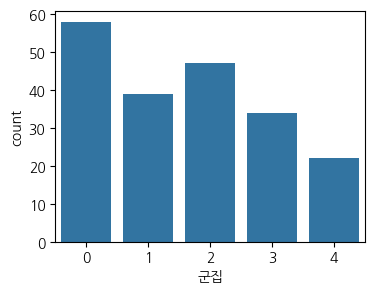

In [15]:
plt.figure(figsize=(4,3))
sns.countplot(x="Íµ∞Ïßë", data=df);

#### Ïó∞ÏÜçÌòï Î≥ÄÏàò ÏãúÍ∞ÅÌôî

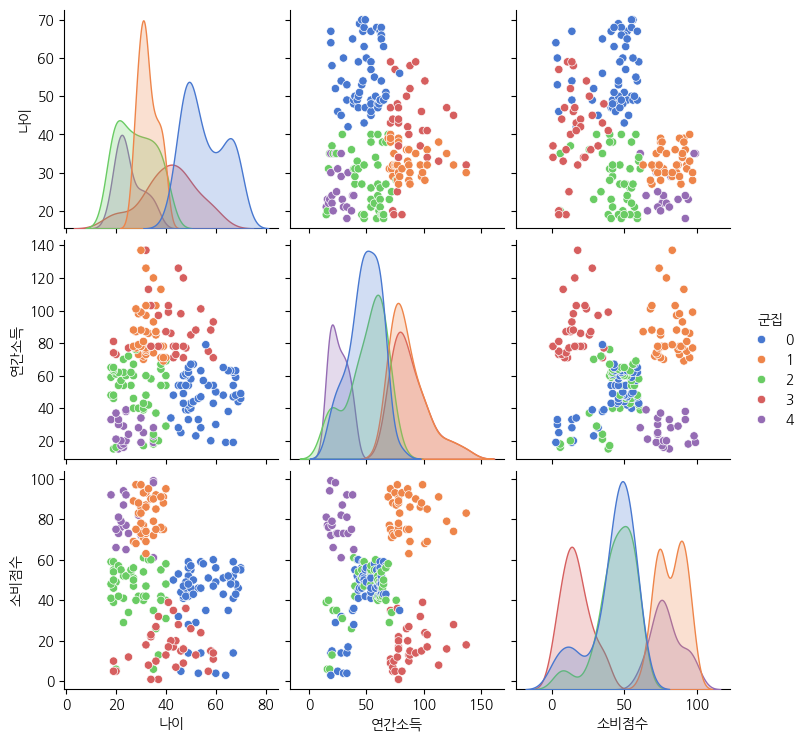

In [ ]:
# -------------------
# Ïó∞ÏÜçÌòï Î≥ÄÏàò ÏãúÍ∞ÅÌôî
# -------------------
sns.pairplot(df[["ÎÇòÏù¥", "Ïó∞Í∞ÑÏÜåÎìù", "ÏÜåÎπÑÏ†êÏàò", "Íµ∞Ïßë"]], 
             hue='Íµ∞Ïßë', palette='muted');

#### Î≤îÏ£ºÌòï Î≥ÄÏàò ÏãúÍ∞ÅÌôî

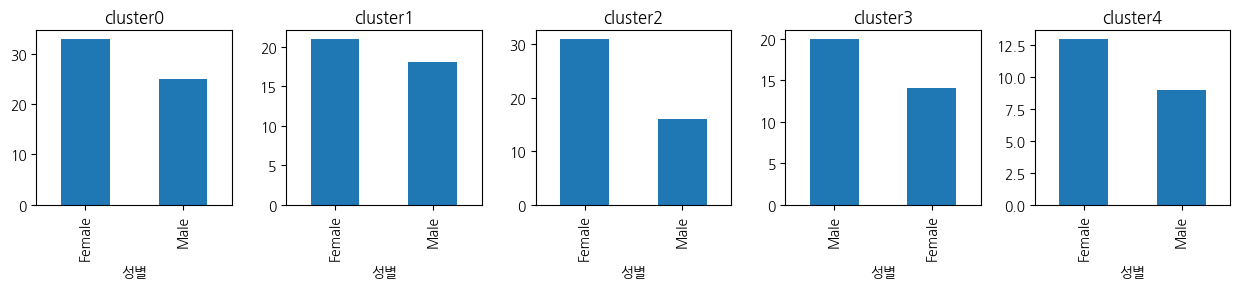

In [17]:
# -----------------------------
# ÏÑ±Î≥Ñ ÎπàÎèÑÏàò ÏãúÍ∞ÅÌôî
# -----------------------------
plt.figure(figsize=(15,3))
for i in range(k):
    plt.subplot(1,6,i+1)
    df.loc[df["Íµ∞Ïßë"]==i, "ÏÑ±Î≥Ñ"].value_counts().plot(kind="bar", title=f"cluster{i}")
    plt.tight_layout()

#### ÌäπÏÑ±-Íµ∞Ïßë Î∂ÑÏÑù

In [ ]:
# -----------------------------
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÎÇ®ÏÑ±Ïùò ÎπÑÏú®
#   0:0.43
#   1:0.46
#   2:0.34(Ïó¨ÏÑ±ÎπÑÏú®Ïù¥ Í∞ÄÏû• ÎÜíÏùå)
#   3:0.59(ÎÇ®ÏÑ±ÎπÑÏú®Ïù¥ Í∞ÄÏû• ÎÜíÏùå, Ïú†ÏùºÌïú ÎÇ®Ïûê>Ïó¨Ïûê)
#   4:0.41
# -----------------------------
df['ÏÑ±Î≥Ñ_Ïù¥ÏßÑ'] = df['ÏÑ±Î≥Ñ'].map({'Male':1, 'Female':0})    # ÏÑ±Î≥Ñ Ïª¨ÎüºÏùÑ ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞Î°ú Î≥ÄÌôò
df[["ÏÑ±Î≥Ñ_Ïù¥ÏßÑ", "Íµ∞Ïßë"]].groupby(by="Íµ∞Ïßë").mean().round(2)    # Íµ∞ÏßëÎ≥ÑÎ°ú ÏÑ±Î≥Ñ_Ïù¥ÏßÑ ÌèâÍ∑† Í≥ÑÏÇ∞

ÏÑ±Î≥Ñ_Ïù¥ÏßÑ
Íµ∞Ïßë       
0  0.4300
1  0.4600
2  0.3400
3  0.5900
4  0.4100

- Ïó¨ÏûêÏùò ÏÑ±Î≥ÑÏùÄ 0Ïù¥Îãà, Ï†ÑÏ≤¥Ïùò ÌèâÍ∑†ÏùÄ ÎÇ®ÏûêÏùò ÎπÑÏú®Í≥º Í∞ôÏùå

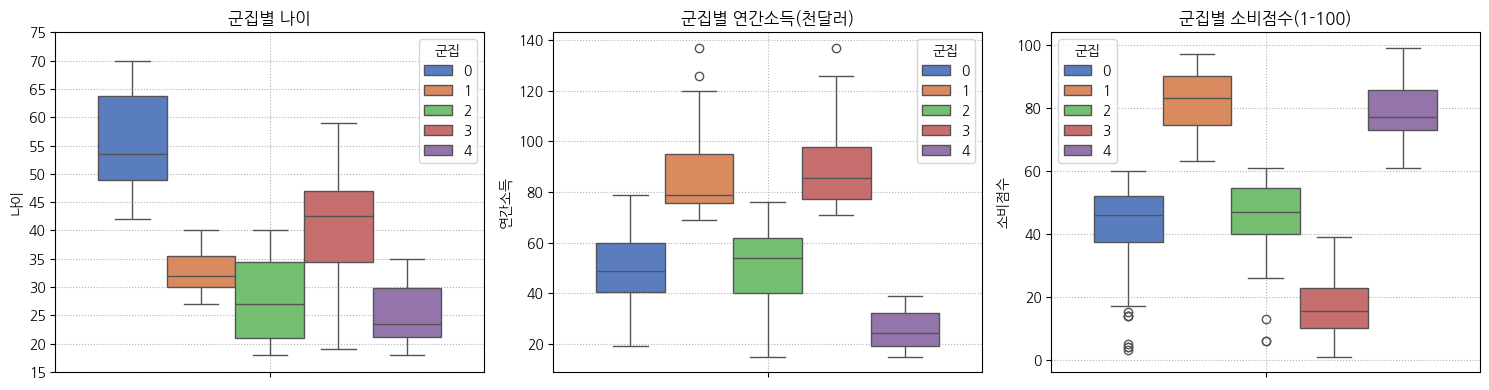

In [19]:
# -----------------------------
# "ÎÇòÏù¥", "Ïó∞Í∞ÑÏÜåÎìù(Ï≤úÎã¨Îü¨)", "ÏÜåÎπÑÏ†êÏàò(1-100)"
# -----------------------------
fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.boxplot(y="ÎÇòÏù¥", data=df, hue="Íµ∞Ïßë", palette="muted", ax=ax[0])
sns.boxplot(y="Ïó∞Í∞ÑÏÜåÎìù", data=df, hue="Íµ∞Ïßë", palette="muted", ax=ax[1])
sns.boxplot(y="ÏÜåÎπÑÏ†êÏàò", data=df, hue="Íµ∞Ïßë", palette="muted", ax=ax[2])

ax[0].set_title('Íµ∞ÏßëÎ≥Ñ ÎÇòÏù¥')
ax[0].set_yticks(range(15,80,5))
ax[0].grid(ls=':')

ax[1].set_title('Íµ∞ÏßëÎ≥Ñ Ïó∞Í∞ÑÏÜåÎìù(Ï≤úÎã¨Îü¨)')
ax[1].grid(ls=':')

ax[2].set_title('Íµ∞ÏßëÎ≥Ñ ÏÜåÎπÑÏ†êÏàò(1-100)')
ax[2].grid(ls=':')

plt.tight_layout()

- 'Ïó∞Í∞ÑÏÜåÎìù'Í≥º 'ÏÜåÎπÑÏ†êÏàò' Ï∂ïÏóêÏÑú Íµ∞ÏßëÎì§Ïù¥ Î™ÖÌôïÌïòÍ≤å Î∂ÑÎ¶¨ÎêòÎäî Í≤ÉÏùÑ Í¥ÄÏ∞∞Ìï† Ïàò ÏûàÏùå

In [ ]:
# -------------------
# Íµ∞ÏßëÎ≥Ñ Ïó∞Î†π Î≤îÏúÑ
#   0: 42~70(ÎÜíÏùå, Ï§ëÏû•ÎÖÑÏ∏µ)
#   1: 27~40(Í≤ΩÏ†úÌôúÎèôÌôúÎ∞úÌïúÎÇòÏù¥)
#   2: 18~40(ÎÇÆÏùå, Ï≤≠ÎÖÑÏ∏µ)
#   3: 19~59(ÎÑìÍ≤åÎ∂ÑÌè¨)
#   4: 18~35(ÎÇÆÏùå, Ï≤≠ÎÖÑÏ∏µ)
# -------------------
df.groupby(by='Íµ∞Ïßë')['ÎÇòÏù¥'].agg(['min','max']) 

min  max
Íµ∞Ïßë          
0    42   70
1    27   40
2    18   40
3    19   59
4    18   35

In [ ]:
# -------------------
# Íµ∞ÏßëÎ≥Ñ Ïó∞Í∞ÑÏÜåÎìù Î≤îÏúÑ 
#   0: 19~79(ÎÑìÍ≤å Î∂ÑÌè¨)
#   1: 69~137(Í∞ÄÏû• ÎÜíÏùå)
#   2: 15~76(ÎÑìÍ≤å Î∂ÑÌè¨)
#   3: 71~137(Í∞ÄÏû• ÎÜíÏùå)
#   4: 15~39(ÎÇÆÏùå)
# -------------------
df.groupby(by='Íµ∞Ïßë')['Ïó∞Í∞ÑÏÜåÎìù'].agg(['min','max']) 

min  max
Íµ∞Ïßë          
0    19   79
1    69  137
2    15   76
3    71  137
4    15   39

In [ ]:
# -------------------
# Íµ∞ÏßëÎ≥Ñ ÏÜåÎπÑÏ†êÏàò Î≤îÏúÑ 
#   0: 3~60(ÎÑìÍ≤å Î∂ÑÌè¨)
#   1: 63~97(Í∞ÄÏû• ÎÜíÏùå)
#   2: 6~61(ÎÑìÍ≤å Î∂ÑÌè¨)
#   3: 1~39(Í∞ÄÏû• ÎÇÆÏùå)
#   4: 61~99(Í∞ÄÏû• ÎÜíÏùå)
# -------------------
df.groupby(by='Íµ∞Ïßë')['ÏÜåÎπÑÏ†êÏàò'].agg(['min','max']) 

min  max
Íµ∞Ïßë          
0     3   60
1    63   97
2     6   61
3     1   39
4    61   99

#### Íµ∞ÏßëÎ≥Ñ ÌäπÏßï Ï†ïÎ¶¨

üí° K=5 Íµ∞ÏßëÎ≥Ñ ÌäπÏßï Ï†ïÎ¶¨ Î∞è Í≥†Í∞ù ÏÑ∏Î∂ÑÌôî

<br>

| ÌÅ¥Îü¨Ïä§ÌÑ∞ | ÎÇ®ÏÑ± ÎπÑÏú® | Ïó∞Î†π | Ïó∞Í∞ÑÏÜåÎìù (Ï≤úÎã¨Îü¨) | ÏÜåÎπÑÏ†êÏàò | Í≥†Í∞ù ÌäπÏßï (ÏÑ∏Í∑∏Î®ºÌä∏) |
|---|---|---|---|---|---|
| 0 (58Î™Ö) | 0.43 | Ï§ëÏû•ÎÖÑÏ∏µ <br> (42~70) | Ï§ëÍ∞Ñ~ÎÜíÏùå <br> (19~79) | Ï§ëÍ∞Ñ (35~60) | ÌèâÎ≤îÌïú Ï§ëÏû•ÎÖÑ Í≥†Í∞ù: ÏïàÏ†ïÏ†Å ÏÜåÎìù, Ï§ëÍ∞Ñ ÏàòÏ§ÄÏùò ÏÜåÎπÑ |
| 1 (39Î™Ö) | 0.46 | Í≤ΩÏ†ú ÌôúÎèôÏ∏µ <br> (27~40) | ÎÜíÏùå <br> (69~137) | ÎÜíÏùå (63~97) | VIP Í≥†ÏÜåÎìù-Í≥†ÏÜåÎπÑ Í≥†Í∞ù: Í∞ÄÏû• ÎÜíÏùÄ ÏÜåÎìùÍ≥º ÏÜåÎπÑ, **ÌïµÏã¨ ÎßàÏºÄÌåÖ ÎåÄÏÉÅ** |
| 2 (47Î™Ö) | 0.34 <br> (Ïó¨ÏÑ± Îã§Ïàò) | Ï†ÄÏó∞Î†πÏ∏µ <br> (18~40) | Ï§ëÍ∞Ñ~ÎÜíÏùå <br> (15~76) | Ï§ëÍ∞Ñ <br> (6~61) | Ïû†Ïû¨Ï†Å Í≥†Í∞ù (Ï†ÄÏÜåÎπÑ): ÏÜåÎìùÏùÄ Îã§ÏñëÌïòÎÇò ÏÜåÎπÑ ÏÑ±Ìñ•Ïù¥ Îß§Ïö∞ ÎÇÆÏùå |
| 3 (34Î™Ö) | 0.59 <br> (ÎÇ®ÏÑ± Îã§Ïàò) | Îã§ÏñëÌï® <br> (19~59) | ÎÜíÏùå <br> (71~137) | ÎÇÆÏùå <br> (1~39) | Ï†àÏïΩÌòï Í≥†ÏÜåÎìù Í≥†Í∞ù: ÏÜåÎìùÏùÄ ÎÜíÏúºÎÇò ÏÜåÎπÑ ÏÑ±Ìñ•Ïù¥ Îß§Ïö∞ ÎÇÆÏùå, ÎÇ®ÏÑ± ÎπÑÏ§ë ÎÜíÏùå |
| 4 (22Î™Ö) | 0.41 | Ï†ÄÏó∞Î†πÏ∏µ <br> (18~35) | ÎÇÆÏùå <br> (15~39) | ÎÜíÏùå <br> (61~99) | ÎÇ≠ÎπÑÌòï Ï†ÄÏÜåÎìù Í≥†Í∞ù: ÏÜåÎìùÏùÄ ÎÇÆÏúºÎÇò ÏÜåÎπÑ ÏÑ±Ìñ•Ïù¥ Îß§Ïö∞ ÎÜíÏùå, <br> Ï∂©ÏÑ±ÎèÑ ÎÇÆÏùÄ Í≥†Í∞ùÏùº Í∞ÄÎä•ÏÑ± ÏûàÏùå |

$\text{K}=5$ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÄ 'Ïó∞Í∞ÑÏÜåÎìù'Í≥º 'ÏÜåÎπÑÏ†êÏàò' Ï∂ïÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í≥†Í∞ùÏùÑ Ìö®Í≥ºÏ†ÅÏúºÎ°ú Î∂ÑÎ¶¨ÌïòÍ≥† ÏûàÏùå

1. VIP Í≥†Í∞ù (Íµ∞Ïßë 1): ÎÜíÏùÄ ÏÜåÎìùÍ≥º ÏÜåÎπÑ ÏÑ±Ìñ•ÏùÑ Î≥¥Ïó¨Ï£ºÎäî Í∞ÄÏû• Ïù¥ÏÉÅÏ†ÅÏù∏ Í≥†Í∞ù Í∑∏Î£π

2. Ïû†Ïû¨/Ï†àÏïΩÌòï Í≥†ÏÜåÎìù Í≥†Í∞ù (Íµ∞Ïßë 3): ÏÜåÎìùÏùÄ ÎÜíÏúºÎÇò ÏÜåÎπÑ ÏÑ±Ìñ•Ïù¥ ÎÇÆÏïÑ, ÎßûÏ∂§Ìòï ÎßàÏºÄÌåÖÏùÑ ÌÜµÌï¥ ÏÜåÎπÑÎ•º Ïú†ÎèÑÌï† Ïàò ÏûàÎäî Í∑∏Î£π(ÎÇ®ÏÑ± ÎπÑÏ§ë ÎÜíÏùå)

3. ÎÇ≠ÎπÑÌòï Ï†ÄÏÜåÎìù Í≥†Í∞ù (Íµ∞Ïßë 4): ÏÜåÎìùÏóê ÎπÑÌï¥ ÏÜåÎπÑÍ∞Ä ÎÜíÏùÄ Í∑∏Î£πÏúºÎ°ú, Ïù¥ÌÉà Î∞©ÏßÄ Î∞è Í±¥Ï†ÑÌïú ÏÜåÎπÑ Ïú†ÎèÑ Ï†ÑÎûµÏù¥ ÌïÑÏöîÌï®

## K = 6

#### ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÌïôÏäµ

In [23]:
k = 6
from sklearn.cluster import KMeans
km = KMeans(n_clusters=k, random_state=random_state, n_init=20)
km.fit(X_preporcessed)
df['Íµ∞Ïßë'] = km.labels_
df.head()

Í≥†Í∞ùID      ÏÑ±Î≥Ñ  ÎÇòÏù¥  Ïó∞Í∞ÑÏÜåÎìù  ÏÜåÎπÑÏ†êÏàò  Íµ∞Ïßë  ÏÑ±Î≥Ñ_Ïù¥ÏßÑ
0     1    Male  19    15    39   4      1
1     2    Male  21    15    81   4      1
2     3  Female  20    16     6   2      0
3     4  Female  23    16    77   4      0
4     5  Female  31    17    40   2      0

### Íµ∞ÏßëÎ∂ÑÏÑù

#### Íµ∞ÏßëÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ïàò

In [24]:
df['Íµ∞Ïßë'].value_counts().sort_index()

Íµ∞Ïßë
0    45
1    39
2    21
3    34
4    23
5    38
Name: count, dtype: int64

- Ï¥ù 200Î™ÖÏùò Í≥†Í∞ùÏù¥ 6Í∞úÏùò Íµ∞ÏßëÏóê ÎπÑÍµêÏ†Å Í∑†Îì±ÌïòÍ≤å Î∂ÑÎ∞∞Îê®
- ÌäπÌûà Íµ∞Ïßë 2($21$Î™Ö)ÏôÄ Íµ∞Ïßë 4($23$Î™Ö)Îäî Îã§Î•∏ Íµ∞ÏßëÏóê ÎπÑÌï¥ Í≥†Í∞ù ÏàòÍ∞Ä Ï†ÅÏùÄ Ìé∏

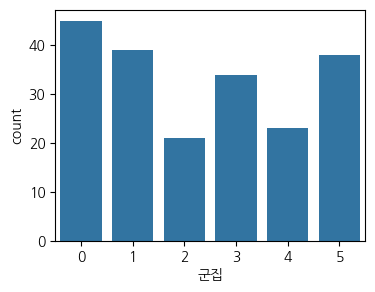

In [25]:
plt.figure(figsize=(4,3))
sns.countplot(x="Íµ∞Ïßë", data=df);

#### Ïó∞ÏÜçÌòï Î≥ÄÏàò ÏãúÍ∞ÅÌôî

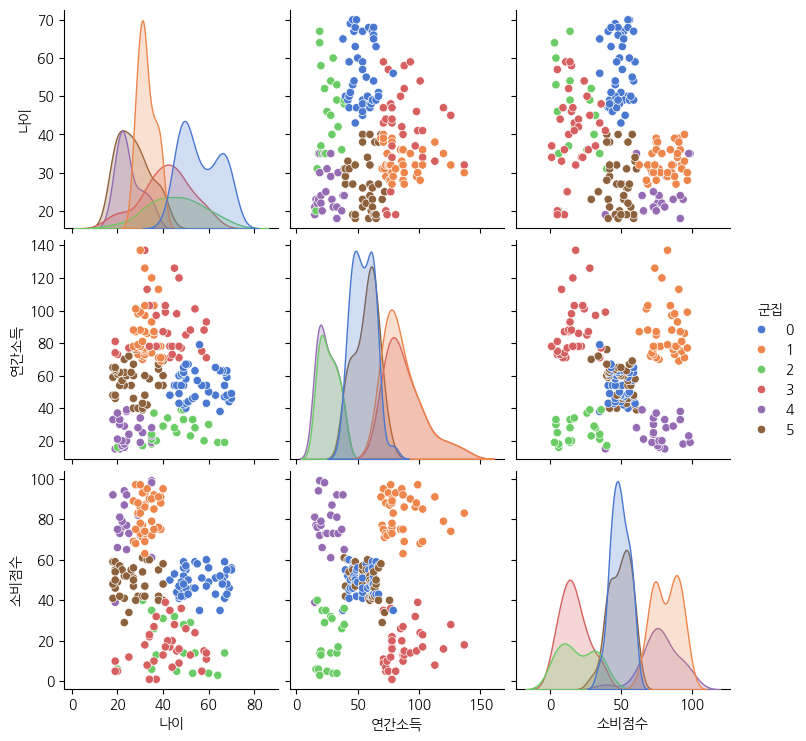

In [ ]:
# -------------------
# Ïó∞ÏÜçÌòï Î≥ÄÏàò ÏãúÍ∞ÅÌôî
# -------------------
sns.pairplot(df[["ÎÇòÏù¥", "Ïó∞Í∞ÑÏÜåÎìù", "ÏÜåÎπÑÏ†êÏàò", "Íµ∞Ïßë"]], 
             hue='Íµ∞Ïßë', palette='muted');

#### Î≤îÏ£ºÌòï Î≥ÄÏàò ÏãúÍ∞ÅÌôî

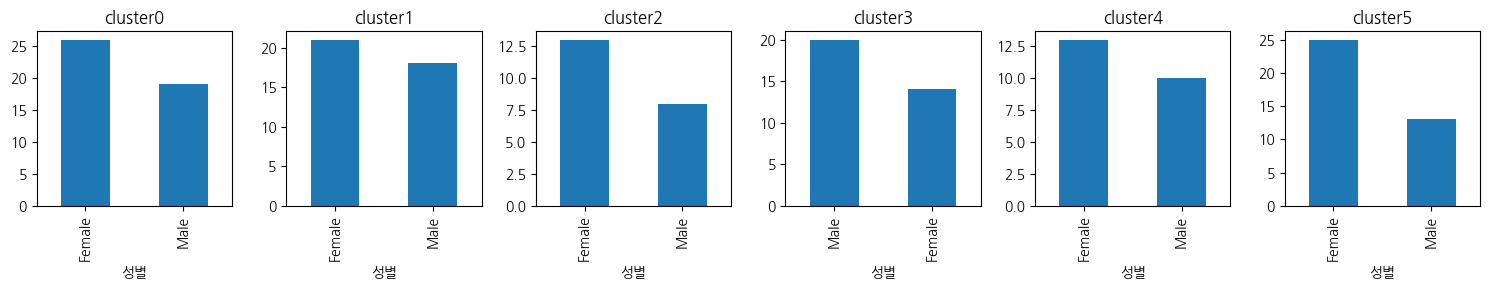

In [27]:
# -----------------------------
# ÏÑ±Î≥Ñ ÎπàÎèÑÏàò ÏãúÍ∞ÅÌôî
# -----------------------------
plt.figure(figsize=(15,3))
for i in range(k):
    plt.subplot(1,6,i+1)
    df.loc[df["Íµ∞Ïßë"]==i, "ÏÑ±Î≥Ñ"].value_counts().plot(kind="bar", title=f"cluster{i}")
    plt.tight_layout()

#### ÌäπÏÑ±-Íµ∞Ïßë Î∂ÑÏÑù

In [ ]:
# -----------------------------
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÎÇ®ÏÑ±Ïùò ÎπÑÏú®
#   0:0.42
#   1:0.46
#   2:0.38
#   3:0.59(ÎÇ®ÏÑ±ÎπÑÏú®Ïù¥ Í∞ÄÏû• ÎÜíÏùå)
#   4:0.43
#   5:0.34(Ïó¨ÏÑ±ÎπÑÏú®Ïù¥ Í∞ÄÏû• ÎÜíÏùå)
# -----------------------------
df['ÏÑ±Î≥Ñ_Ïù¥ÏßÑ'] = df['ÏÑ±Î≥Ñ'].map({'Male':1, 'Female':0})
df[["ÏÑ±Î≥Ñ_Ïù¥ÏßÑ", "Íµ∞Ïßë"]].groupby(by="Íµ∞Ïßë").mean().round(2)


ÏÑ±Î≥Ñ_Ïù¥ÏßÑ
Íµ∞Ïßë       
0  0.4200
1  0.4600
2  0.3800
3  0.5900
4  0.4300
5  0.3400

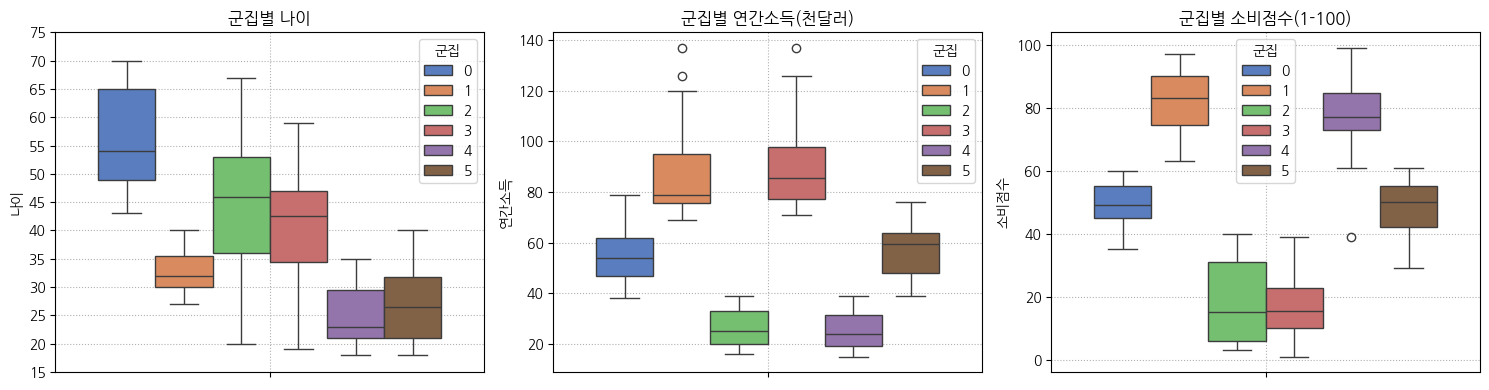

In [29]:
# -----------------------------
# "ÎÇòÏù¥", "Ïó∞Í∞ÑÏÜåÎìù(Ï≤úÎã¨Îü¨)", "ÏÜåÎπÑÏ†êÏàò(1-100)"
# -----------------------------
fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.boxplot(y="ÎÇòÏù¥", data=df, hue="Íµ∞Ïßë", palette="muted", ax=ax[0])
sns.boxplot(y="Ïó∞Í∞ÑÏÜåÎìù", data=df, hue="Íµ∞Ïßë", palette="muted", ax=ax[1])
sns.boxplot(y="ÏÜåÎπÑÏ†êÏàò", data=df, hue="Íµ∞Ïßë", palette="muted", ax=ax[2])

ax[0].set_title('Íµ∞ÏßëÎ≥Ñ ÎÇòÏù¥')
ax[0].set_yticks(range(15,80,5))
ax[0].grid(ls=':')

ax[1].set_title('Íµ∞ÏßëÎ≥Ñ Ïó∞Í∞ÑÏÜåÎìù(Ï≤úÎã¨Îü¨)')
ax[1].grid(ls=':')

ax[2].set_title('Íµ∞ÏßëÎ≥Ñ ÏÜåÎπÑÏ†êÏàò(1-100)')
ax[2].grid(ls=':')

plt.tight_layout()

In [ ]:
# -------------------
# Íµ∞ÏßëÎ≥Ñ Ïó∞Î†π Î≤îÏúÑ
#   0: 43~70(ÎÜíÏùå, Ï§ëÏû•ÎÖÑÏ∏µ)
#   1: 27~40(Í≤ΩÏ†úÌôúÎèôÌôúÎ∞úÌïúÎÇòÏù¥)
#   2: 20~67(ÎÑìÍ≤åÎ∂ÑÌè¨)
#   3: 19~59(ÎÑìÍ≤åÎ∂ÑÌè¨)
#   4: 18~35(ÎÇÆÏùå, Ï≤≠ÎÖÑÏ∏µ)
#   5: 18~40(ÎÇÆÏùå, Ï≤≠ÎÖÑÏ∏µ)
# -------------------
df.groupby(by='Íµ∞Ïßë')['ÎÇòÏù¥'].agg(['min','max']) 


min  max
Íµ∞Ïßë          
0    43   70
1    27   40
2    20   67
3    19   59
4    18   35
5    18   40

In [ ]:
# -------------------
# Íµ∞ÏßëÎ≥Ñ Ïó∞Í∞ÑÏÜåÎìù Î≤îÏúÑ 
#   0: 38~79(Ï§ëÍ∞Ñ)
#   1: 69~137(Í∞ÄÏû• ÎÜíÏùå)
#   2: 16~39(Í∞ÄÏû• ÎÇÆÏùå)
#   3: 71~137(ÎÜíÏùå)
#   4: 15~29(Í∞ÄÏû• ÎÇÆÏùå)
#   5: 39~76(Ï§ëÍ∞Ñ)
# -------------------
df.groupby(by='Íµ∞Ïßë')['Ïó∞Í∞ÑÏÜåÎìù'].agg(['min','max']) 


min  max
Íµ∞Ïßë          
0    38   79
1    69  137
2    16   39
3    71  137
4    15   39
5    39   76

In [ ]:
# -------------------
# Íµ∞ÏßëÎ≥Ñ ÏÜåÎπÑÏ†êÏàò Î≤îÏúÑ 
#   0: 35~60(Ï§ëÍ∞Ñ)
#   1: 63~97(Í∞ÄÏû• ÎÜíÏùå)
#   2: 3~40(Í∞ÄÏû• ÎÇÆÏùå)
#   3: 1~39(Í∞ÄÏû• ÎÇÆÏùå)
#   4: 39~99(ÎÜíÏùå)
#   5: 29~61(Ï§ëÍ∞Ñ)
# -------------------
df.groupby(by='Íµ∞Ïßë')['ÏÜåÎπÑÏ†êÏàò'].agg(['min','max']) 


min  max
Íµ∞Ïßë          
0    35   60
1    63   97
2     3   40
3     1   39
4    39   99
5    29   61

#### Íµ∞ÏßëÎ≥Ñ ÌäπÏßï Ï†ïÎ¶¨

üí° K=6 Íµ∞ÏßëÎ≥Ñ ÌäπÏßï Ï†ïÎ¶¨ Î∞è Í≥†Í∞ù ÏÑ∏Î∂ÑÌôî

$\text{K}=6$ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥ºÎäî $\text{K}=5$Î≥¥Îã§ Í≥†Í∞ùÍµ∞ÏùÑ Ï¢Ä Îçî ÏÑ∏Î∂ÑÌôîÌïòÏó¨ Ïó∞Î†πÏóê Îî∞Î•∏ Ï∞®Ïù¥Î•º Î™ÖÌôïÌûà Î≥¥Ïó¨Ï§å

<br>

| ÌÅ¥Îü¨Ïä§ÌÑ∞  | ÎÇ®ÏÑ± ÎπÑÏú® | Ïó∞Î†π | Ïó∞Í∞ÑÏÜåÎìù (Ï≤úÎã¨Îü¨) | ÏÜåÎπÑÏ†êÏàò | Ï£ºÏöî ÌäπÏßï (Í≥†Í∞ù ÏÑ∏Í∑∏Î®ºÌä∏) |
|---|---|---|---|---|---|
| **0** |  0.42 | ÎÜíÏùå <br> (43~70) | Ï§ëÍ∞Ñ <br> (38~79) | Ï§ëÍ∞Ñ <br> (35~60) | Ï§ëÏû•ÎÖÑ ÌèâÍ∑†: ÏïàÏ†ïÏ†Å ÏÜåÎìù Î∞è ÏÜåÎπÑ, ÎßàÏºÄÌåÖ ÎπÑÏö© Ìö®Ïú®ÏùÑ Í≥†Î†§Ìï¥Ïïº Ìï® |
| **1** |  0.46 | Í≤ΩÏ†ú ÌôúÎèôÏ∏µ <br> (27~40) | ÎÜíÏùå <br> (69~137) | ÎÜíÏùå <br> (63~97) | VIP Í≥†ÏÜåÎìù-Í≥†ÏÜåÎπÑ: **ÌïµÏã¨ ÌÉÄÍ≤ü**, ÎÜíÏùÄ Ï∂©ÏÑ±ÎèÑÎ•º Ïú†ÏßÄÌïòÎäî ÎßàÏºÄÌåÖ ÌïÑÏöî |
| **2** |  0.38 | ÎÑìÍ≤å Î∂ÑÌè¨ <br> (20~67) | ÎÇÆÏùå <br> (16~39) | ÎÇÆÏùå <br> (3~40) | Ï†ÄÏÜåÎìù/Ï†ÄÏÜåÎπÑ: ÏÜåÎìùÎèÑ ÏÜåÎπÑÎèÑ Í∞ÄÏû• ÎÇÆÏùÄ Í∑∏Î£π, <br>  Ïû†Ïû¨ Í≥†Í∞ù ÎòêÎäî Ïù¥ÌÉà ÏúÑÌóòÍµ∞. |
| **3** |  0.59 <br> (ÎÇ®ÏÑ± Îã§Ïàò) | ÎÑìÍ≤å Î∂ÑÌè¨ <br> (19~59) | ÎÜíÏùå <br> (71~137) | ÎÇÆÏùå <br> (1~39) | Ï†àÏïΩÌòï Í≥†ÏÜåÎìù ÎÇ®ÏÑ±: ÏÜåÎìùÏùÄ ÎÜíÏúºÎÇò ÏÜåÎπÑ ÏÑ±Ìñ•Ïù¥ Îß§Ïö∞ ÎÇÆÏùå, <br> Ï†àÏïΩÌïòÎäî Í≤ΩÌñ•Ïù¥ Í∞ïÌï® |
| **4** |  0.43 | ÎÇÆÏùå <br> (18~35) | ÎÇÆÏùå <br> (15~39) | ÎÜíÏùå <br> (39~99) | ÎÇ≠ÎπÑÌòï Ï†ÄÏÜåÎìù: ÏÜåÎìù ÎåÄÎπÑ ÏÜåÎπÑÍ∞Ä Í∞ÄÏû• ÎÜíÏùå, <br>  Ï†äÏùÄ Ï∂©Îèô Íµ¨Îß§ ÏÑ±Ìñ•Ïù¥ Í∞ïÌï® |
| **5** |  0.34 <br> (Ïó¨ÏÑ± Îã§Ïàò) | ÎÇÆÏùå <br> (18~40) | Ï§ëÍ∞Ñ <br> (39~76) | Ï§ëÍ∞Ñ <br> (29~61) | Ï†ÄÏó∞Î†π ÌèâÍ∑†: $\text{K}=5$ÏóêÏÑú Î∂ÑÎ¶¨Îêú Í∑∏Î£π, <br> $\text{K}=0$Í≥º Ïú†ÏÇ¨ÌïòÎÇò Ïó∞Î†πÏù¥ ÎÇÆÏùå |

$\text{K}=6$ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÄ $\text{K}=5$ÏôÄ ÎπÑÍµêÌïòÏó¨ Ï§ëÍ∞Ñ ÏÜåÎìù/Ï§ëÍ∞Ñ ÏÜåÎπÑ Í∑∏Î£πÏùÑ Ïó∞Î†πÏóê Îî∞Îùº Îçî Î™ÖÌôïÌïòÍ≤å Î∂ÑÎ¶¨Ìï®

(Ï†ÄÏÜåÎìù/Ï†ÄÏÜåÎπÑ Í∑∏Î£πÏùÑ ÎèÖÎ¶ΩÏ†ÅÏù∏ Íµ∞ÏßëÏúºÎ°ú Î∂ÑÎ¶¨Ìï¥ÎÉÑ)

<br>

**1. ÌïµÏã¨ ÏÑ∏Í∑∏Î®ºÌä∏ (K=5ÏóêÏÑú Ïú†ÏßÄÎêú Í∞ïÎ†•Ìïú Í∑∏Î£π)**

- Íµ∞Ïßë 1 (VIP Í≥†ÏÜåÎìù-Í≥†ÏÜåÎπÑ Í≥†Í∞ù): Ïó∞Í∞Ñ ÏÜåÎìùÍ≥º ÏÜåÎπÑ Ï†êÏàò Î™®Îëê Í∞ÄÏû• ÎÜíÏùÄ Í∑∏Î£πÏúºÎ°ú, ÎßàÏºÄÌåÖÏùò **ÏµúÏö∞ÏÑ† ÌÉÄÍ≤ü**

- Íµ∞Ïßë 3 (Ï†àÏïΩÌòï Í≥†ÏÜåÎìù ÎÇ®ÏÑ±): ÏÜåÎìùÏù¥ ÎÜíÏßÄÎßå ÏÜåÎπÑ Ï†êÏàòÍ∞Ä Í∞ÄÏû• ÎÇÆÏùÄ Í∑∏Î£π, ÎÇ®ÏÑ± ÎπÑÏú®Ïù¥ Í∞ÄÏû• ÎÜíÍ≤å ÎÇòÌÉÄÎÇ®  
 Ïù¥Îì§Ïùò ÏÜåÎπÑÎ•º Ïú†ÎèÑÌï† Ïàò ÏûàÎäî ÎßûÏ∂§ Ï†ÑÎûµÏù¥ Ï§ëÏöîÌï®

- Íµ∞Ïßë 4 (ÎÇ≠ÎπÑÌòï Ï†ÄÏÜåÎìù Í≥†Í∞ù): ÏÜåÎìùÏùÄ ÎÇÆÏßÄÎßå ÏÜåÎπÑ Ï†êÏàòÍ∞Ä ÎÜíÏïÑ, Ï∂©Îèô Íµ¨Îß§ ÏÑ±Ìñ•Ïù¥ ÎÜíÍ±∞ÎÇò Ïû†Ïû¨Ï†ÅÏúºÎ°ú Î∂ÄÏ±Ñ ÏúÑÌóòÏù¥ ÏûàÎäî Í∑∏Î£πÏúºÎ°ú,  
 ÎßûÏ∂§Ìòï ÏÉÅÌíà Ï∂îÏ≤úÏù¥ Ìö®Í≥ºÏ†ÅÏùº Ïàò ÏûàÏùå

<br>

**2. K=6ÏóêÏÑú ÏÑ∏Î∂ÑÌôîÎêú Í∑∏Î£π**

$\text{K}=6$Ïùò Ï£ºÏöî Î≥ÄÌôîÎäî $\text{K}=5$Ïùò 'ÌèâÎ≤îÌïú Í≥†Í∞ù' Í∑∏Î£πÏù¥ **'Ïó∞Î†π'**Í≥º **'ÏÜåÎìù'**Ïóê Îî∞Îùº Îçî ÎÇòÎâòÏóàÎã§Îäî Ï†ê

- Íµ∞Ïßë 0 (Ï§ëÏû•ÎÖÑ ÌèâÍ∑†): $\text{K}=5$Ïùò 'ÌèâÎ≤îÌïú Ï§ëÏû•ÎÖÑ Í≥†Í∞ù' Í∑∏Î£πÍ≥º Ïú†ÏÇ¨ÌïòÎ©∞, ÎÜíÏùÄ Ïó∞Î†πÎåÄ(43~70ÏÑ∏)Ïóê Ï§ëÍ∞Ñ ÏÜåÎìù/ÏÜåÎπÑ ÏàòÏ§ÄÏùÑ Î≥¥ÏûÑ

- Íµ∞Ïßë 5 (Ï†ÄÏó∞Î†π ÌèâÍ∑†): Ïó∞Î†πÎåÄÍ∞Ä ÎÇÆÍ≥† Ï§ëÍ∞Ñ ÏàòÏ§ÄÏùò ÏÜåÎìù/ÏÜåÎπÑÎ•º Î≥¥Ïù¥Î©∞, Ïó¨ÏÑ± ÎπÑÏú®Ïù¥ Í∞ÄÏû• ÎÜíÍ≤å ÎÇòÌÉÄÎÇòÎäî Í∑∏Î£π

- Íµ∞Ïßë 2 (Ï†ÄÏÜåÎìù/Ï†ÄÏÜåÎπÑ): ÏÜåÎìùÍ≥º ÏÜåÎπÑ Î™®Îëê Í∞ÄÏû• ÎÇÆÏùÄ Í∑∏Î£π, Ïù¥Îì§ÏùÑ ÏúÑÌïú ÌäπÎ≥Ñ ÌîÑÎ°úÎ™®ÏÖòÏù¥ÎÇò Ï†ÄÍ∞Ä ÏÉÅÌíà Ï†ÑÎûµÏùÑ Í≥†Î†§Ìï† Ïàò ÏûàÏùå